# AirBnB Listings Analysis

#### **Objective 1: Data Prep & QA**
- Read in the AirBnb listings data (use low_memory=False and encoding="ISO-8859-1" in read_csv).
- Cast any date columns as a datetime format.
- Filter down data to just listings in the city of Sydney.
- QA the Sydney listings data: check for missing values and calculate the minimum, maximum, and average for each numeric field.

In [2]:
# Importing packages
import pandas as pd

# Reading the data and cast the 'host_since' column as a datetime format
listings = pd.read_csv(
    r"C:\Users\User\Downloads\Airbnb+Data\Airbnb Data\Listings.csv",
    encoding="ISO-8859-1",
    low_memory=False,
    parse_dates=["host_since"]
)

In [3]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [5]:
sydney_listings = (
    listings
    .query("city == 'Sydney'")
    .loc[:, ['host_since', 'neighbourhood', 'city', 'accommodates', 'price']]
)

sydney_listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33630 entries, 9237 to 273178
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     33596 non-null  datetime64[ns]
 1   neighbourhood  33630 non-null  object        
 2   city           33630 non-null  object        
 3   accommodates   33630 non-null  int64         
 4   price          33630 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.5+ MB


In [6]:
sydney_listings.isna().sum()

host_since       34
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [7]:
sydney_listings.describe()

,host_since,accommodates,price
count,33596,33630.000000,33630.000000
mean,2016-02-22 12:27:41.340635904,3.266994,222.013440
min,2009-05-14 00:00:00,1.000000,5.000000
25%,2014-08-19 00:00:00,2.000000,74.000000
50%,2016-01-05 00:00:00,2.000000,120.000000
75%,2017-10-20 00:00:00,4.000000,219.000000
max,2021-02-07 00:00:00,16.000000,28613.000000
std,NaN,2.146717,472.636189


#### **Objective 2: Prepare for Visualization**
- Create a Dataframe called `sydney_listings_neighbourhood`. Group the Sydney listings by `neighbourhood` and calculate the average price for each. Sort by price in ascending order.
- Create a Dataframe called `sydney_listings_accommodates`. Filter your data down to the most expensive neighbourhood in Sydney. Group it by `accommodates` and calculate the average price for each. Sort by price in ascending order.
- Finally, create a Dataframe called `sydney_listings_over_time`. Group the data by the year component of `host_since`. Calculate a count of rows to get the number of new hosts for each year, and the average price of listings for each year.

In [9]:
sydney_listings_neighbourhood = (
    sydney_listings
    .groupby('neighbourhood')
    .agg({'price': 'mean'})
    .sort_values('price')
)

sydney_listings_neighbourhood.tail()

,price
neighbourhood,
Manly,320.906806
Hunters Hill,321.764706
Woollahra,333.175109
Mosman,432.658333
Pittwater,615.278112


In [10]:
sydney_listings_accommodates = (
    sydney_listings
    .query("neighbourhood == 'Pittwater'")
    .groupby('accommodates')
    .agg({'price': 'mean'})
    .sort_values('price')
)

sydney_listings_accommodates.tail()

,price
accommodates,
10,1421.435897
12,1507.684211
14,2351.750000
15,2443.000000
16,2488.000000


In [11]:
sydney_listings_over_time = (
    sydney_listings
    .set_index('host_since')
    .resample('YE')
    .agg({
        'neighbourhood': 'count',
        'price': 'mean'
    })
)

sydney_listings_over_time.head()

,neighbourhood,price
host_since,,
2009-12-31,25,1333.680000
2010-12-31,198,354.580808
2011-12-31,587,201.347530
2012-12-31,1755,255.549858
2013-12-31,2963,247.508606


#### Objective 3: Visualize the Data
- Create a horizontal bar chart of average rent price by neighbourhood. Which neighbourhoods stand out?
- Create a horizontal bar chart of average price by accommodates in the most expensive neighbourhood. Are the results intuitive?
- Create line charts of new hosts per year and average price by year. What happened to new hosts in 2015? Was average price impacted?
- Plot both time series in a dual axis line chart.

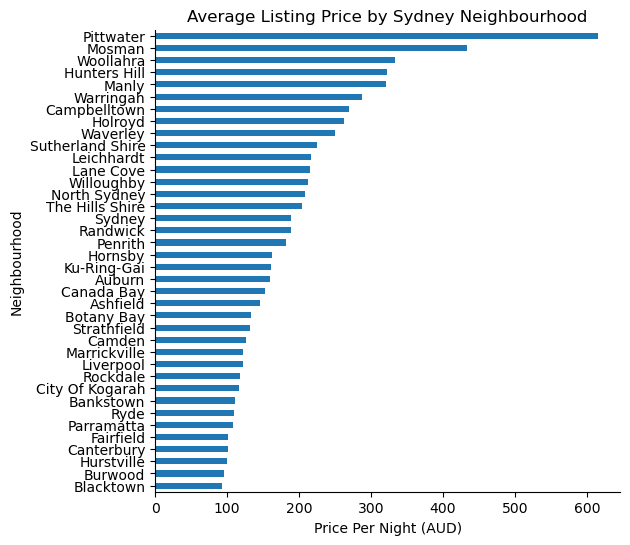

In [13]:
import seaborn as sns

(sydney_listings_neighbourhood
 .plot
 .barh(
     title='Average Listing Price by Sydney Neighbourhood',
     xlabel='Price Per Night (AUD)',
     ylabel='Neighbourhood',
     legend=None,
     figsize=(6,6)
 )
)

sns.despine()

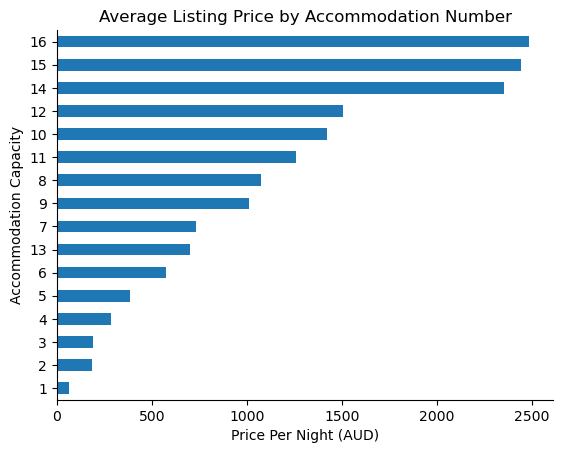

In [14]:
(sydney_listings_accommodates
 .plot
 .barh(
     title='Average Listing Price by Accommodation Number',
     xlabel='Price Per Night (AUD)',
     ylabel='Accommodation Capacity',
     legend=None
 )
)

sns.despine()

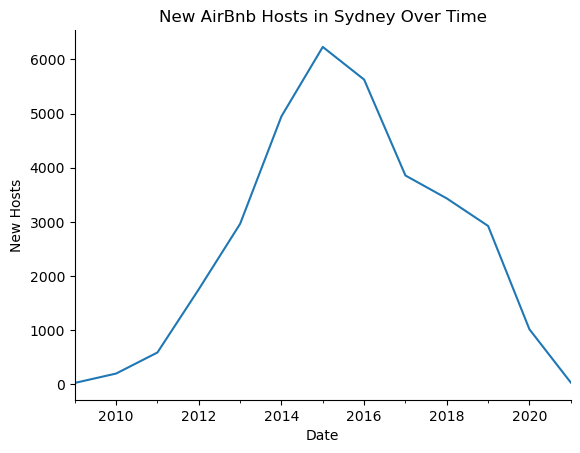

In [15]:
sydney_listings_over_time['neighbourhood'].plot(
    xlabel='Date',
    ylabel='New Hosts',
    title='New AirBnb Hosts in Sydney Over Time'
)

sns.despine()

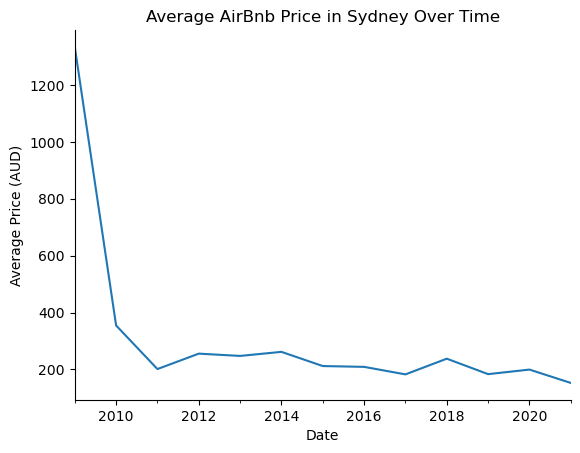

In [16]:
sydney_listings_over_time['price'].plot(
    xlabel='Date',
    ylabel='Average Price (AUD)',
    title='Average AirBnb Price in Sydney Over Time'
)

sns.despine()

Text(0.5, 1.0, '2015 Regulations Lead to Fewer New Hosts and Decline in Prices')

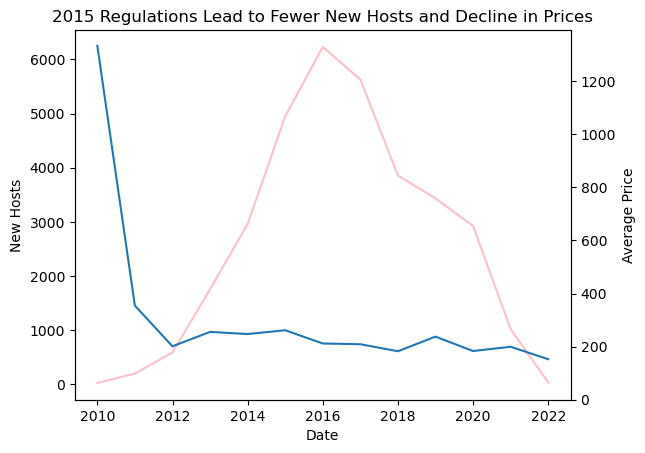

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(
    sydney_listings_over_time.index,
    sydney_listings_over_time['neighbourhood'],
    label='New Hosts',
    c='pink'
)

ax.set_ylabel('New Hosts')
ax.set_xlabel('Date')

ax2 = ax.twinx()

ax2.plot(
    sydney_listings_over_time.index,
    sydney_listings_over_time['price'],
    label='Average Price'
)

ax2.set_ylim(0)
ax2.set_ylabel('Average Price')

ax.set_title('2015 Regulations Lead to Fewer New Hosts and Decline in Prices')